<a href="https://colab.research.google.com/github/sumaia42/Machine_Learning/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

In [71]:
df = pd.read_csv("/content/diabetes_data.csv",delimiter=';')
df

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,Female,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,Female,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,Female,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [72]:
df.isnull().sum()

age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
class                 0
dtype: int64

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    int64 
 3   polydipsia          520 non-null    int64 
 4   sudden_weight_loss  520 non-null    int64 
 5   weakness            520 non-null    int64 
 6   polyphagia          520 non-null    int64 
 7   genital_thrush      520 non-null    int64 
 8   visual_blurring     520 non-null    int64 
 9   itching             520 non-null    int64 
 10  irritability        520 non-null    int64 
 11  delayed_healing     520 non-null    int64 
 12  partial_paresis     520 non-null    int64 
 13  muscle_stiffness    520 non-null    int64 
 14  alopecia            520 non-null    int64 
 15  obesity             520 non-null    int64 
 16  class               520 no

In [74]:
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [75]:
map = {'Male': 0, 'Female': 1}
df['gender']=df['gender'].replace(map)
df

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,1,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   age                 520 non-null    int64
 1   gender              520 non-null    int64
 2   polyuria            520 non-null    int64
 3   polydipsia          520 non-null    int64
 4   sudden_weight_loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   polyphagia          520 non-null    int64
 7   genital_thrush      520 non-null    int64
 8   visual_blurring     520 non-null    int64
 9   itching             520 non-null    int64
 10  irritability        520 non-null    int64
 11  delayed_healing     520 non-null    int64
 12  partial_paresis     520 non-null    int64
 13  muscle_stiffness    520 non-null    int64
 14  alopecia            520 non-null    int64
 15  obesity             520 non-null    int64
 16  class               520 non-null    int64
dt

In [77]:
df.corr()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
age,1.000000,-0.062872,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,0.108679
gender,-0.062872,1.000000,0.268894,0.312262,0.281840,0.124490,0.219968,-0.208961,0.208092,0.052496,0.013735,0.101978,0.332288,0.090542,-0.327871,0.005396,0.449233
polyuria,0.199781,0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
polydipsia,0.137382,0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
sudden_weight_loss,0.064808,0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
weakness,0.224596,0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
polyphagia,0.315577,0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
genital_thrush,0.096519,-0.208961,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
visual_blurring,0.402729,0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
itching,0.296559,0.052496,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384


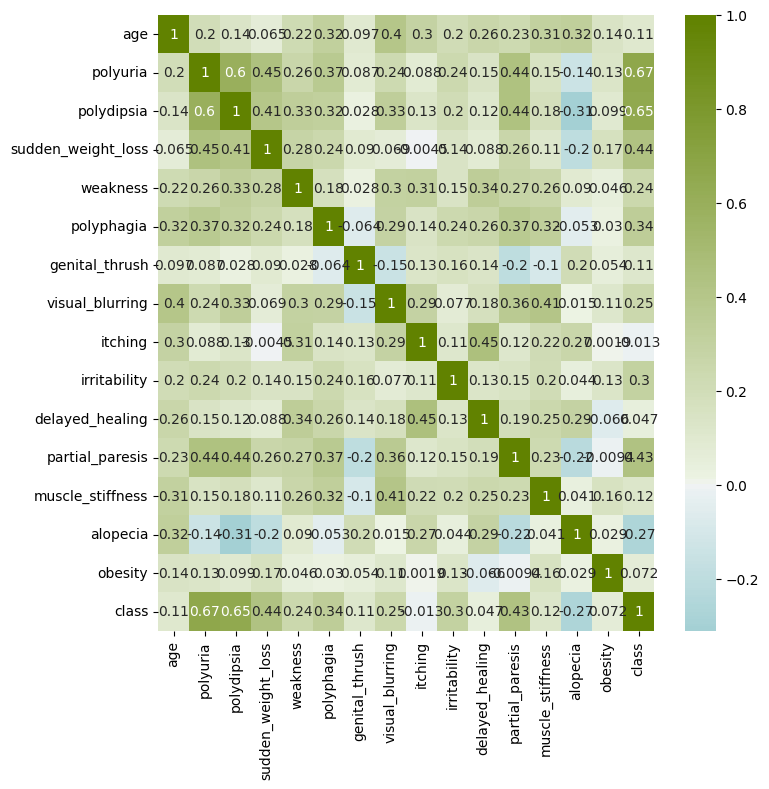

In [78]:
corr_data = df.corr()
fig, ax = plt.subplots(figsize = (8, 8))
color_map = sns.diverging_palette(204, 106, s = 100, as_cmap=True)
sns.heatmap(corr_data.drop(columns=['gender'], index=['gender']), cmap=color_map, annot=True, ax = ax, center=0.00000)
plt.show()
del corr_data

<Axes: xlabel='gender', ylabel='count'>

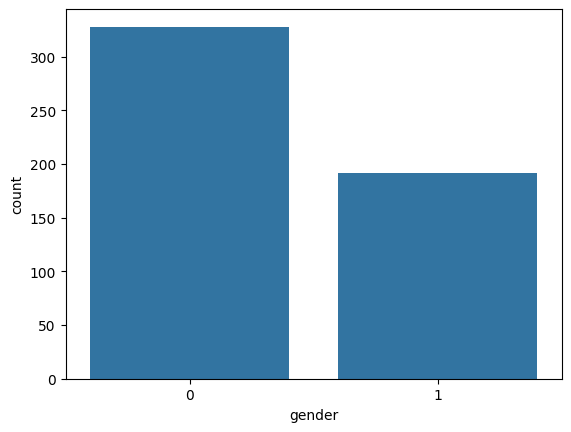

In [79]:
sns.countplot(x="gender", data=df)

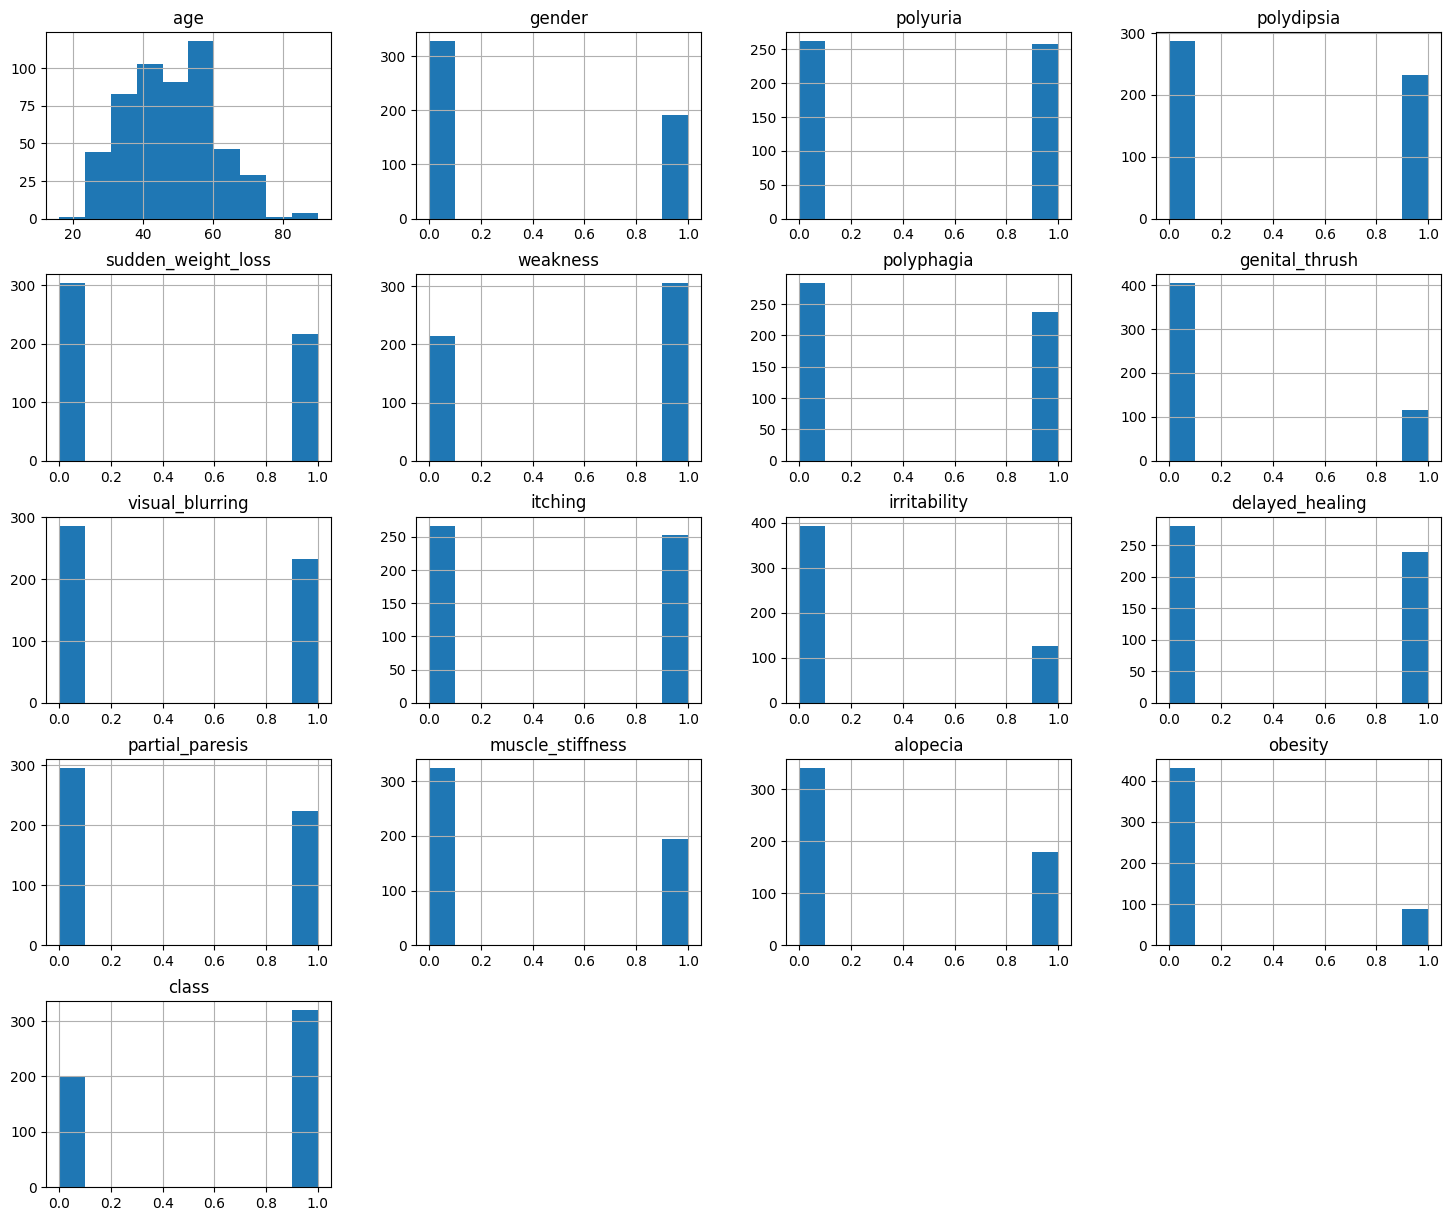

In [80]:
df.hist(figsize=(18,15))
plt.show()

In [81]:
y = df.iloc[:, -1]
X = df.drop('class', axis=1)

In [82]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=5)

Model1

In [83]:
from sklearn.svm import SVC
sv=SVC(kernel='linear')
sv.fit(Xtrain,ytrain)

SVC(kernel='linear')

In [84]:
predictions = sv.predict(Xtest)

In [85]:
sv.score(Xtest,ytest)

0.9423076923076923

In [86]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        65
           1       0.94      0.97      0.95        91

    accuracy                           0.94       156
   macro avg       0.94      0.94      0.94       156
weighted avg       0.94      0.94      0.94       156



In [87]:
print(confusion_matrix(ytest,predictions))

[[59  6]
 [ 3 88]]


Model2

In [88]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(Xtrain, ytrain)

DecisionTreeClassifier()

In [89]:
test_predictions = decision_tree.predict(Xtest)

In [90]:
decision_tree.score(Xtest,ytest)

0.967948717948718

In [91]:
print(classification_report(ytest,test_predictions))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        65
           1       0.97      0.98      0.97        91

    accuracy                           0.97       156
   macro avg       0.97      0.97      0.97       156
weighted avg       0.97      0.97      0.97       156



In [92]:
print(confusion_matrix(ytest, test_predictions))

[[62  3]
 [ 2 89]]


Model3

In [93]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(Xtrain, ytrain)

RandomForestClassifier()

In [94]:
test_predictions = random_forest.predict(Xtest)

In [95]:
random_forest.score(Xtest,ytest)

0.9935897435897436

In [96]:
print(classification_report(ytest,test_predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        65
           1       0.99      1.00      0.99        91

    accuracy                           0.99       156
   macro avg       0.99      0.99      0.99       156
weighted avg       0.99      0.99      0.99       156



In [97]:
print(confusion_matrix(ytest, test_predictions))

[[64  1]
 [ 0 91]]


Model4

In [98]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(Xtrain, ytrain)

KNeighborsClassifier()

In [99]:
Knn_predictions = knn.predict(Xtest)

In [100]:
knn.score(Xtest,ytest)

0.9102564102564102

In [101]:
print(classification_report(ytest,Knn_predictions))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        65
           1       0.98      0.87      0.92        91

    accuracy                           0.91       156
   macro avg       0.91      0.92      0.91       156
weighted avg       0.92      0.91      0.91       156



In [102]:
print(confusion_matrix(ytest, Knn_predictions))

[[63  2]
 [12 79]]


Model5

In [103]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(Xtrain, ytrain)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [104]:
log_predictions = log_reg.predict(Xtest)

In [105]:
log_reg.score(Xtest,ytest)

0.9423076923076923

In [106]:
print(classification_report(ytest,log_predictions))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        65
           1       0.93      0.98      0.95        91

    accuracy                           0.94       156
   macro avg       0.95      0.94      0.94       156
weighted avg       0.94      0.94      0.94       156



In [107]:
print(confusion_matrix(ytest, log_predictions))

[[58  7]
 [ 2 89]]


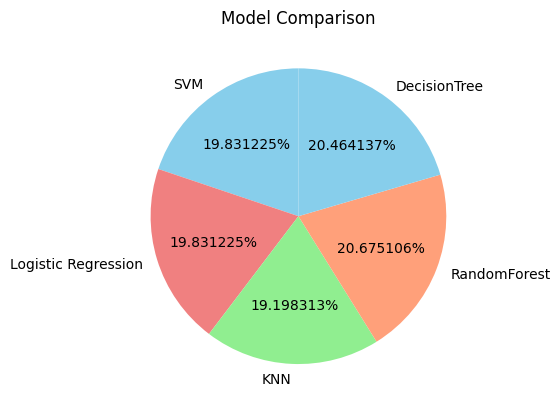

In [108]:

model_names = ['SVM', 'Logistic Regression', 'KNN', 'RandomForest','DecisionTree']
accuracy_values = [0.94, 0.94, 0.91, 0.98,0.97]
plt.pie(accuracy_values, labels=model_names, autopct='%1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon'])
plt.title('Model Comparison')
plt.show()